In [19]:
import cv2
from PIL import Image
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

In [20]:
def loadImage005(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [21]:
def showImage005(img, text=""):
    display(Image.fromarray(img),text)

In [22]:
def addImage005(img1, img2):
    img = cv2.add(img1, img2)
    return img

In [23]:
def subImage005(img1, img2):
    img = cv2.subtract(img1, img2)
    return img

In [24]:
def maxImage005(img1, img2):
    img = cv2.max(img1, img2)
    return img

In [25]:
def minImage005(img1, img2):
    img = cv2.min(img1, img2)
    return img

In [26]:
def numpyInverseImage005(img):
    img = 255 - img
    return img

In [27]:
def cvInverseImage005(img):
    img = cv2.bitwise_not(img)
    return img

In [28]:
def cvResizeImage005(img1, img2):
    height, width, channels = img1.shape
    img2 = cv2.resize(img2, (width, height))
    return img2

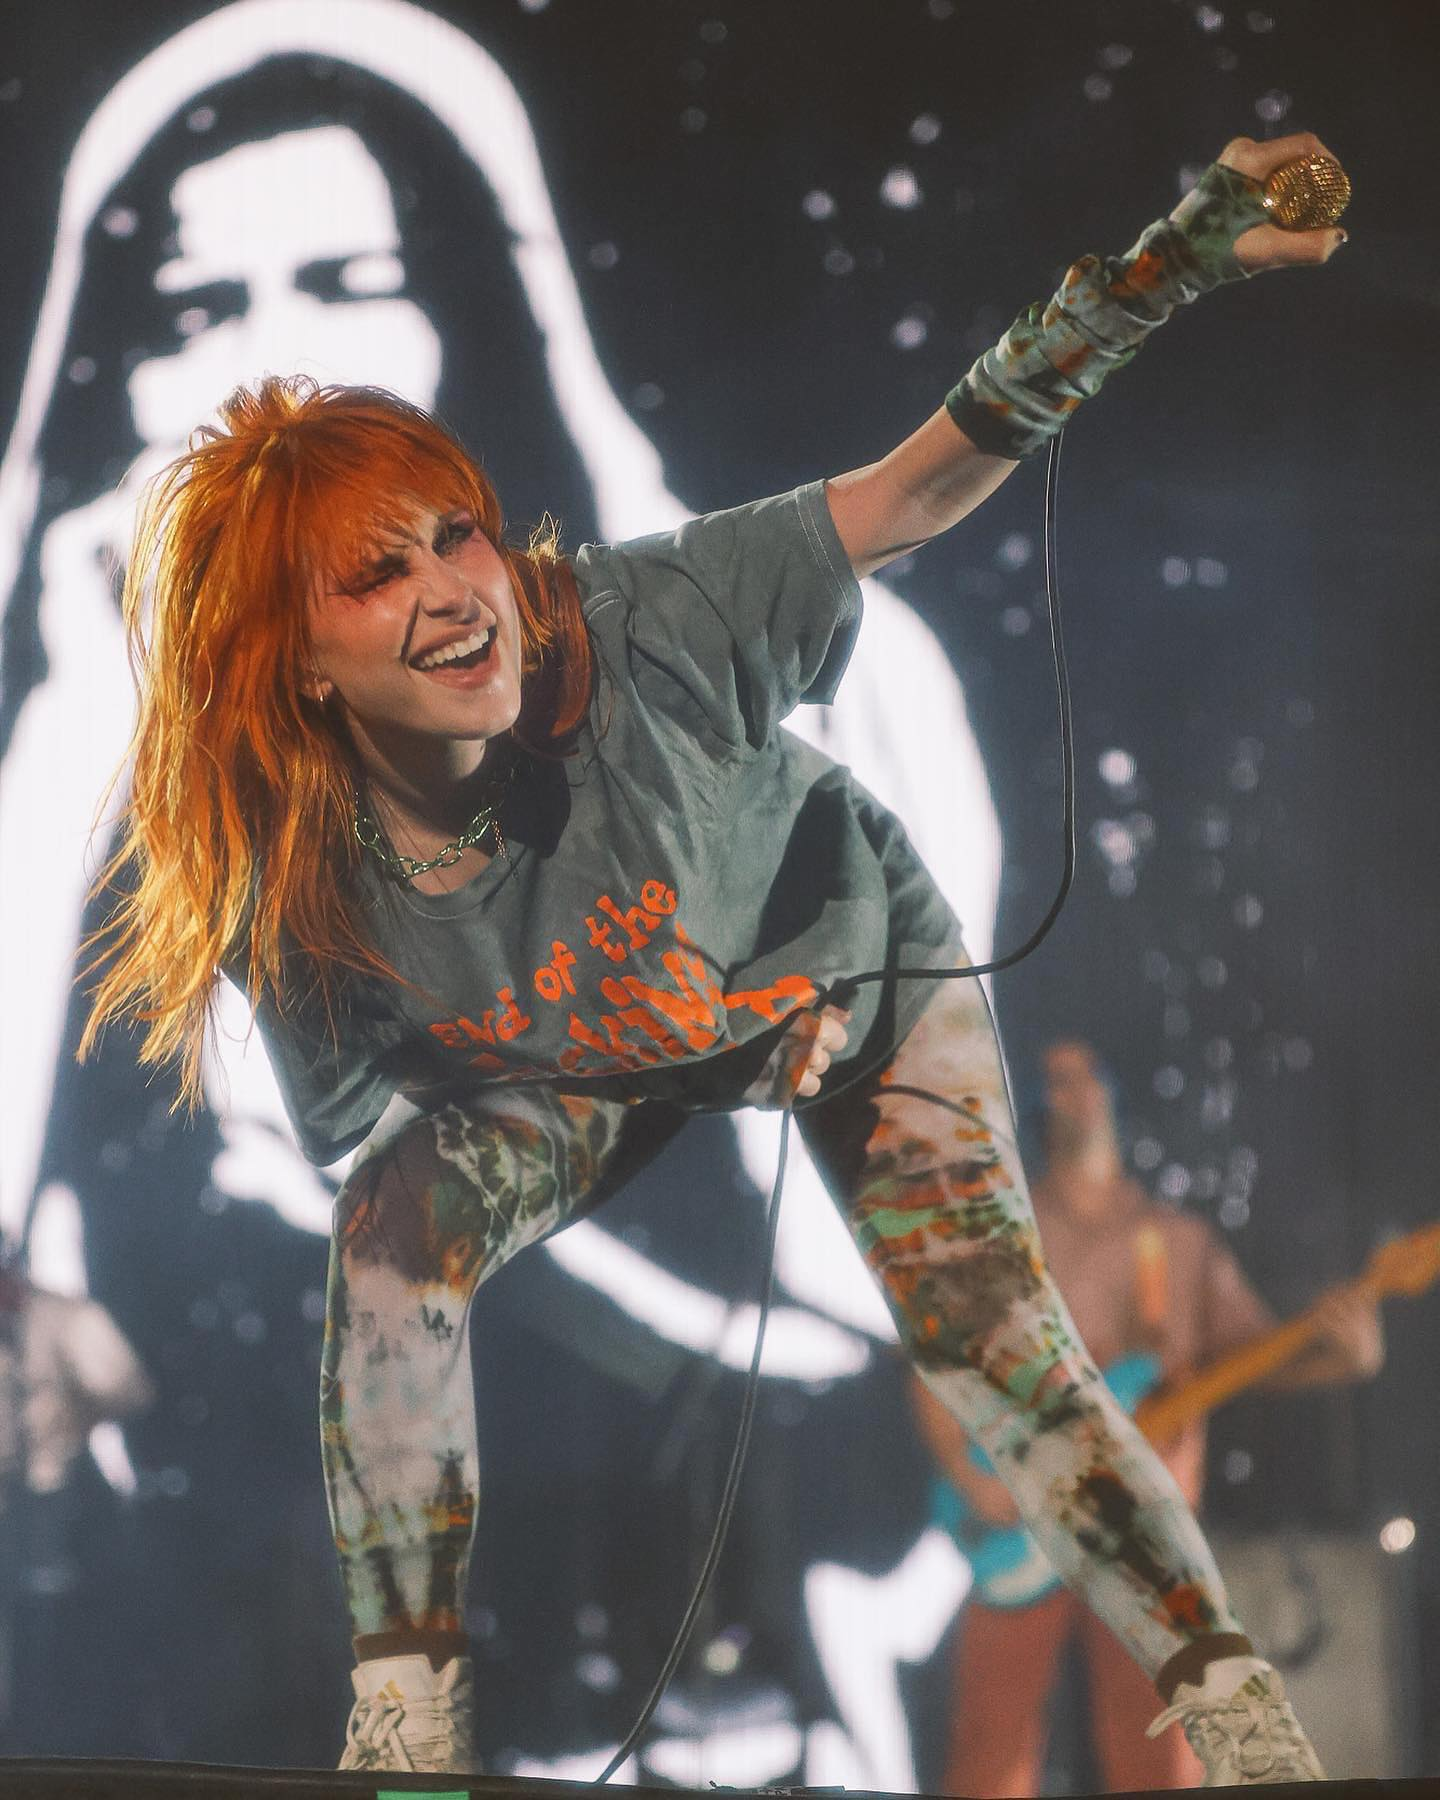

''

In [57]:
foto = loadImage005('images/paramore.jpg')
showImage005(foto)

- Histogram specification dalam pengolahan citra digital adalah teknik yang digunakan untuk mengubah distribusi intensitas dalam citra agar sesuai dengan distribusi yang ditentukan sebelumnya. Ini biasanya dilakukan untuk meningkatkan kualitas gambar atau menyesuaikan dengan kebutuhan aplikasi tertentu. Proses ini melibatkan transformasi dari histogram asli gambar menjadi histogram yang ditentukan sebelumnya dengan mengubah nilai intensitas setiap pixel.

In [58]:
# Histogram asli
hist_src = cv2.calcHist([foto], [0], None, [256], [0, 256])

In [59]:
# Histogram target
hist_dst = np.zeros((256,), dtype=np.float32)
hist_dst[100:150] = 1.0

In [60]:
# Normalisasi histogram
hist_src = hist_src / hist_src.sum()
hist_dst = hist_dst / hist_dst.sum()

In [61]:
# Hitung LUT (Look-up table)
lut = np.zeros((256,), dtype=np.uint8)
sum_src = 0
sum_dst = 0
for i in range(256):
    sum_src += hist_src[i]
    sum_dst += hist_dst[i]
    lut[i] = np.uint8(sum_dst / sum_src * 255)

menghitung LUT (Look-up table) yang digunakan untuk mengubah distribusi intensitas gambar

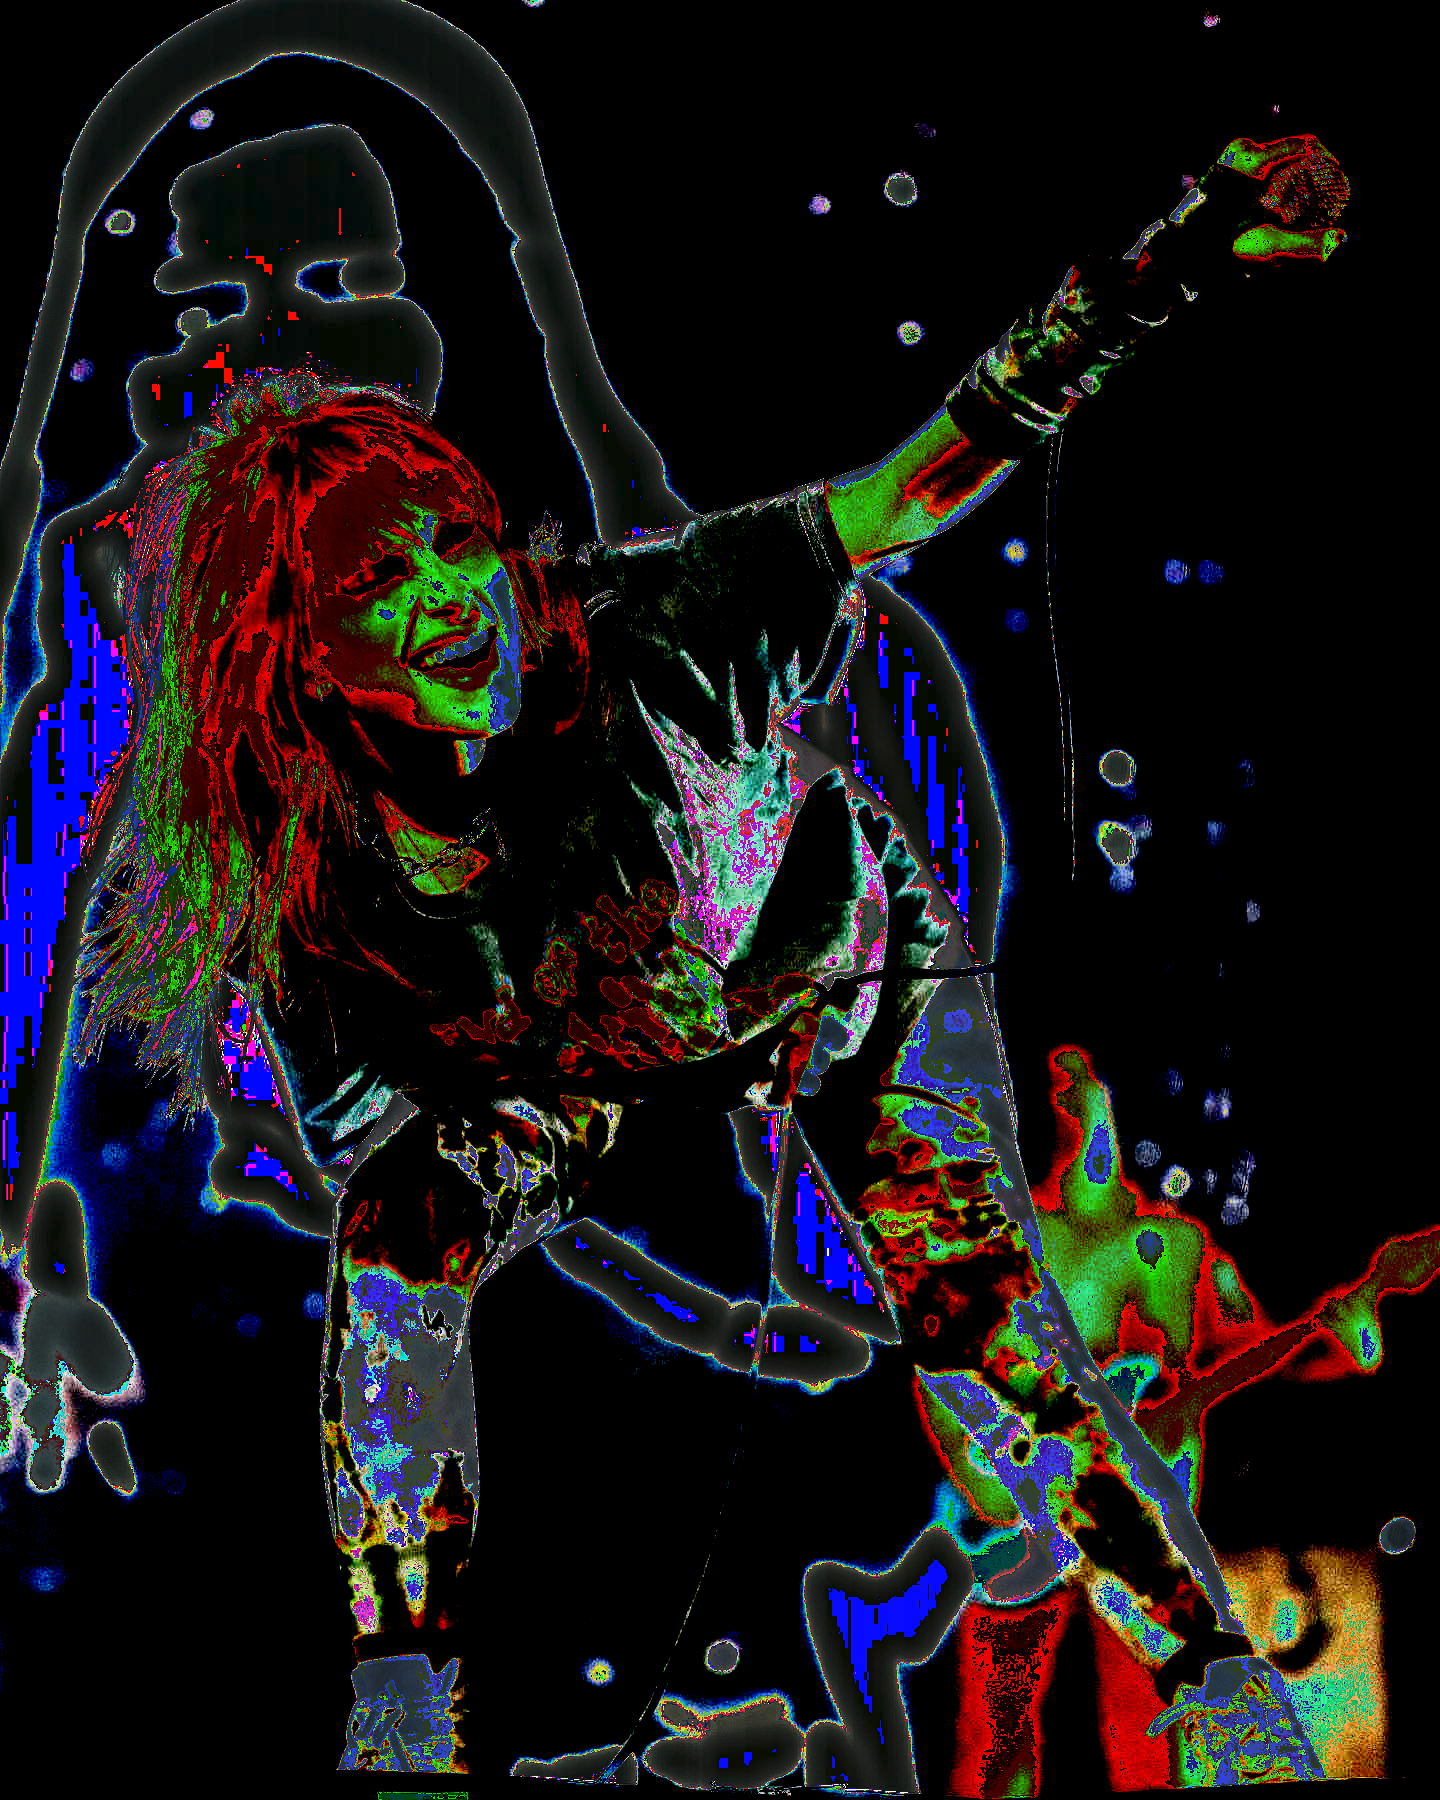

''

In [62]:
# Aplikasi LUT
img_spec = cv2.LUT(foto, lut)
showImage005(img_spec)

In [64]:
r, g, b = cv2.split(img_spec)
print("red : ", r)
print("green : ", g)
print("blue : ", b)

red :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
green :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
blue :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Setelah LUT diterapkan pada gambar, hasilnya adalah gambar yang intensitasnya sesuai dengan histogram target.